[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1A7UaGxOvyOnT7YvBxOuTscnu8cKy1Nt6?usp=sharing)

# **Libraries**

In [1]:
# Import dependencies
from google.colab import files ## Upload file(s) from local
import zipfile ## Unzip zip file(s)
import os ## Interact with file system
import shutil ## Copy file(s)

## Plot image(s)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np ## Images array handle
import tensorflow as tf ## Deep learning library
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator ## Image preprocess and augmentation

import random ## Get random image(s)
import tempfile ## Generate temporary files and directories

# **Data Preparation**

[Soy Bean Dataset from Kaggle](https://www.kaggle.com/datasets/maeloisamignoni/soybeanleafdataset)


Download the dataset using Kaggle API, the official documentation [here](https://www.kaggle.com/docs/api).

In [2]:
# Set Kaggle API
## Installation
! pip install kaggle

## Upload Kaggle API token (.json format) from user's profile 'Create API Token'
files.upload() ### Upload files button appears for import the .json file from local 

## Create a folder for specific Kaggle API location
! mkdir ~/.kaggle

## Copy the uploaded API token to the created folder
! cp kaggle.json ~/.kaggle/

## Modify file permission and ensure user's credential security
! chmod 600 ~/.kaggle/kaggle.json 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


In [3]:
# Create a helper function to unzip file(s)
def unzip(zipfile_name_list):
  """
  Params:
          zipfile_name_list: List contains zipfile name without .zip extensions
  """
  ## Iterate over passed list
  for file in zipfile_name_list:
    ## Merge zipfile name with .zip extension
    file_zip = str(file) + '.zip'
    ## Try open zipfile with read 'r' mode
    try:
      zip_ref = zipfile.ZipFile(file_zip, 'r')
    except:
      print("Something went wrong when read to the unzip file")
    ## Extract readed zipfile by pass the destination path
    zip_ref.extractall('./' + file + '/')
    ## Close read mode
    zip_ref.close()

# Create a function to download and unzip Kaggle dataset by passed its webpage address link
def download_and_unzip_dataset(*dataset_link):
  """
  Params:
          *dataset_link: Kaggle dataset link(s) separate with commas and enclosed by string
  """
  ## Create empty list to collect zipfile name
  zipfile_name = [] 
  ## Iterate over passed Kaggle dataset link/address
  for link in dataset_link:
    ## Split address by forward slash
    slash_split = str(link).split('/')
    ## Set conditions to provide datasets download from either Kaggle regular datasets or competitions webpage
    if slash_split[-3] != 'datasets' and slash_split[-3] != 'competitions':
      ## Raise exception error if addresses are not as expected Kaggle webpage address format
      raise Exception('Link(s) format are not as expected')
    ## Set conditions for Kaggle regular datasets download
    if slash_split[-3] == 'datasets':
      ## Construct a formatted dataset name
      dataset_name = slash_split[-2] + '/' + slash_split[-1]
      ## Do bash command to download datasets
      ! kaggle datasets download $dataset_name
    ## Set conditions for Kaggle competitions datasets download
    if slash_split[-3] == 'competitions':
      ## Construct a formatted dataset name
      dataset_name = slash_split[-1]
      ## Do bash command to download datasets
      ! kaggle competitions download -c $dataset_name
    ## Append last split space as zipfile name
    zipfile_name.append(slash_split[-1])
  ## Execute the created helper function to unzip downloaded file(s)
  unzip(zipfile_name)

In [4]:
# Download the appropriate dataset(s) by pass its Kaggle webpage link to the created function 
## Download the Cassava leaf dataset from Kaggle
download_and_unzip_dataset('https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset')

 93% 159M/172M [00:01<00:00, 121MB/s]
100% 172M/172M [00:01<00:00, 120MB/s]


In [2]:
# Copy image class(es) to appropriate folder also the class name that are desired 
def move_image(src_dir, classname_list, destination_root_dir):
  """
  Params:
          src_dir: Root directory of source, enclosed by string
          classname_list : List contains desired name of class(es), ordered alphabetically
          destination_root_dir : Root directory of destination
  """ 
  ## Ensure the destination root directory is exist
  if not os.path.exists(destination_root_dir):
    ## Create if doesn't exist
    os.makedirs(destination_root_dir)
  ## Create source classname list which is alphabetically sorted
  subdir = sorted([dirs for root, dirs, files in os.walk(src_dir)][0])[0]  
  class_src = sorted([dirs for root, dirs, files in os.walk(src_dir)][1])
  ## Iterate over passed classname_list index
  for index in range(len(classname_list)):
    subdir_path = os.path.join(src_dir, subdir)
    class_dir = os.path.join(subdir_path, class_src[index])
    for file in os.listdir(class_dir):
    ## Ensure the desired classname in destination root directory is exist
      if not os.path.exists(os.path.join(destination_root_dir, str(classname_list[index]))):
      ## Create if doesn't exist
        os.makedirs(os.path.join(destination_root_dir, str(classname_list[index])))
        shutil.copy(os.path.join(class_dir, file), 
                    os.path.join(destination_root_dir, str(classname_list[index])))
      else:
        shutil.copy(os.path.join(class_dir, file), 
                    os.path.join(destination_root_dir, str(classname_list[index])))

In [3]:
# Define desired classname
soybeanleaf_classname = ['Angular Leaf Spot', 
                         'Bean Rust',
                         'Health']

# Define root directories, both source and destination
root_dir = '/tmp/Data'

# Empty root directory to prevent FileExistsError when run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Execute defined function to copy image class(es)
move_image('./bean-leaf-dataset/test', soybeanleaf_classname, root_dir)
move_image('./bean-leaf-dataset/train', soybeanleaf_classname, root_dir)
move_image('./bean-leaf-dataset/validation', soybeanleaf_classname, root_dir)

# **Exploratory Data Analysis**

In [ ]:
# Construct simple EDA function
def simple_eda(data_dir):
  """
  Params:
          data_dir: Image data directory that contains classes folders   
  """
  ## Get classes foldernames 
  class_list = sorted([dirs for root, dirs, files in os.walk(data_dir)][0])
  ## Display the number of classes
  class_num = len(class_list)
  print("There are {} classes with various number of images for each".format(class_num))
  ## Display number of sample images in each class with its percentage
  images_num = []
  total_images = 0
  for each_class in class_list:
    class_dir = os.path.join(data_dir, each_class)
    total_images += len(os.listdir(class_dir))
    images_num.append(len(os.listdir(class_dir)))

  for each_class in class_list:
    class_dir = os.path.join(data_dir, each_class)
    percentage = round((len(os.listdir(class_dir))/total_images)*100)
    print("\n - {} : {} images ({}%)".format(each_class, len(os.listdir(class_dir)), percentage))
  ## Construct the barplot for the number of sample images in each class
  plt.figure(figsize=(8, 6))
  ax = plt.subplot()
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  plt.bar(class_list, images_num, zorder=3)
  plt.grid(zorder=0)
  plt.title("Images Distribution", fontsize=20)
  plt.xlabel("Classes/Categories", fontsize=12)
  plt.show()

# Construct a function to display some sample images
def display_sample(data_dir, num_sample):
  """
  Params:
          data_dir: Image data directory that contains classes folders
          num_sample: The number of sample to display each class  
  """
  class_list = sorted([dirs for root, dirs, files in os.walk(data_dir)][0])
  for each_class in class_list:
    class_dir = os.path.join(data_dir, each_class)
    plt.figure(figsize=(100/num_sample, 4))
    print("\nLabel: {}".format(each_class))
    for index, image_path in enumerate(os.listdir(class_dir)[:num_sample]):
        ax = plt.subplot(1, num_sample, index+1)
        image = mpimg.imread(os.path.join(class_dir, image_path))
        ax.grid()
        plt.imshow(image)
    plt.show()

There are 3 classes with various number of images for each

 - Angular Leaf Spot : 432 images (33%)

 - Bean Rust : 436 images (34%)

 - Health : 428 images (33%)


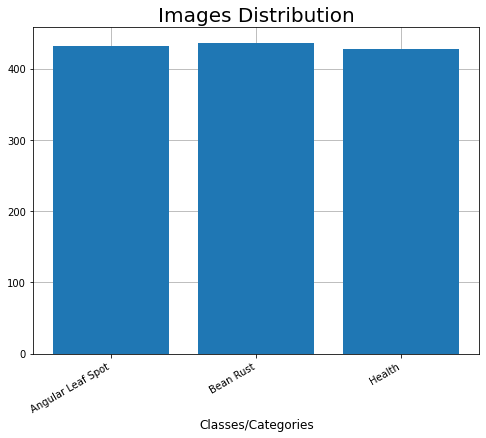

In [ ]:
# Execute simple_eda function
simple_eda(root_dir)


Label: Angular Leaf Spot


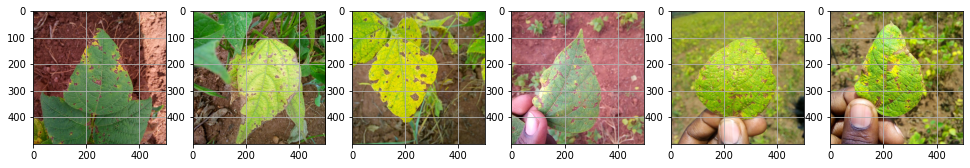


Label: Bean Rust


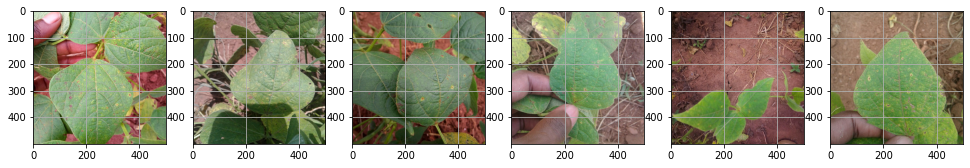


Label: Health


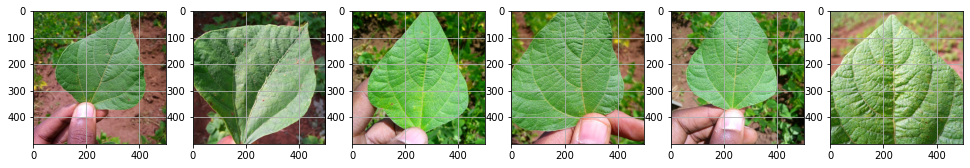

In [ ]:
# Execute display_sample function
display_sample(root_dir, num_sample=6)

# **Split Dataset**

In [4]:
# Define a helper function to split data into training, validation, and testing
def split_class_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
  """
  Params:
      SOURCE: Class source directory
      TRAINING: Destination directory for training split part 
      VALIDATION: Destination directory for validation split part
      TEST: Destination directory for test split part
      SPLIT_SIZE: Split size between train-validation and test
  """ 
  ## Make destination directories if not already exists
  for dir in [TRAINING, VALIDATION, TESTING]:
    if not os.path.exists(dir):
      os.makedirs(dir)

  ## Ensure passed split size is properly
  if SPLIT_SIZE > 1 or SPLIT_SIZE < 0:
    raise Exception('split size should be between 0 and 1')

  ## Copy images to destination
  train_val_len = int(len(os.listdir(SOURCE)) * SPLIT_SIZE)
  for index, file in enumerate(os.listdir(SOURCE)): 
    if index < train_val_len:
      ## Validation part is 30% from train-validation split size part
      if index < int(.7 * train_val_len): 
        shutil.copy(os.path.join(SOURCE, file), os.path.join(str(TRAINING)))
      else:
        shutil.copy(os.path.join(SOURCE, file), os.path.join(str(VALIDATION)))
    else:
      shutil.copy(os.path.join(SOURCE, file), os.path.join(str(TESTING)))

# Define a function to display split distribution
def display_distribution(DIR, split_type=['Train', 'Validation', 'Test']):
  """
  Params:
         DIR: Root directory of destination directory that created for prior function
         split_type: Type of split         
  """ 
  ## Ensure that passed split type is properly
  user_input_type = [split_type]
  type_list = ['Train', 'Validation', 'Test']
  if len(user_input_type) > 1:
    raise Exception("Please choose one type of split")
  if user_input_type[0] not in type_list:
    raise Exception("Please choose a type of split that provided; \'Train\', \'Validation\', or \'Test\'")
  
  ## Display the distribution
  print("\n{}".format(user_input_type[0]))
  for dir_class in sorted(os.listdir(DIR)):
    print('{}: {} images'.format(dir_class, len(os.listdir(os.path.join(DIR, dir_class)))))

In [5]:
# Create appropriate directories corresponds to Train, Validation, and Test split
## Set root directory of split data
root_split_dir = '/tmp/Split'

## Empty root directory to prevent FileExistsError when run several times
if os.path.exists(root_split_dir):
  shutil.rmtree(root_split_dir)

## Set each type of data split
train_split_dir = os.path.join(root_split_dir, 'Train')
validation_split_dir = os.path.join(root_split_dir, 'Validation')
test_split_dir = os.path.join(root_split_dir, 'Test')

## Set train directories each class
als_train_dir = os.path.join(train_split_dir, soybeanleaf_classname[0])
br_train_dir = os.path.join(train_split_dir, soybeanleaf_classname[1])
health_train_dir = os.path.join(train_split_dir, soybeanleaf_classname[2])

## Set validation directories each class
als_validation_dir = os.path.join(validation_split_dir, soybeanleaf_classname[0])
br_validation_dir = os.path.join(validation_split_dir, soybeanleaf_classname[1])
health_validation_dir = os.path.join(validation_split_dir, soybeanleaf_classname[2])

## Set test directories each class
als_test_dir = os.path.join(test_split_dir, soybeanleaf_classname[0])
br_test_dir = os.path.join(test_split_dir, soybeanleaf_classname[1])
health_test_dir = os.path.join(test_split_dir, soybeanleaf_classname[2])

## Pass source directories each class before do split data
als_source_dir = os.path.join(root_dir, soybeanleaf_classname[0])
br_source_dir = os.path.join(root_dir, soybeanleaf_classname[1])
health_source_dir = os.path.join(root_dir, soybeanleaf_classname[2])

## Define split size between training-validation and test set
split_size = .999

## Execute split_class_data function to split data into Train, Validation, and Test set for each class
split_class_data(als_source_dir, als_train_dir, als_validation_dir, als_test_dir, split_size)
split_class_data(br_source_dir, br_train_dir, br_validation_dir, br_test_dir, split_size)
split_class_data(health_source_dir, health_train_dir, health_validation_dir, health_test_dir, split_size)


## Execute display_distribution function
print('[Split Distribution]')
display_distribution(train_split_dir, split_type='Train')
display_distribution(validation_split_dir, split_type='Validation')
display_distribution(test_split_dir, split_type='Test')

[Split Distribution]

Train
Angular Leaf Spot: 301 images
Bean Rust: 304 images
Health: 298 images

Validation
Angular Leaf Spot: 130 images
Bean Rust: 131 images
Health: 129 images

Test
Angular Leaf Spot: 1 images
Bean Rust: 1 images
Health: 1 images


# **Data Augmentation & Generator**

In [6]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

In [7]:
# Define a Train and Validation set function
def train_val_generator(TRAINING_DIR, VALIDATION_DIR, 
                         TARGET_SIZE, TRAIN_BATCH_SIZE, VAL_BATCH_SIZE):
  """
  Params:
        TRAINING_DIR: Directory for training split that contains classes directory
        VALIDATION_DIR: Directory for validation split that contains classes directory
        TARGET_SIZE: Tuple contains target size height and width
        TRAIN_BATCH_SIZE: Desired train split batch size
        VAL_BATCH_SIZE: Desired validation split batch size
  Returns:
        train_genetator: Image data generator for train split
        validation_generator: Image data generator for validation split
  """ 
  ## Instantiate the ImageDataGenerator class with images augmentation
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=.2,
                                     height_shift_range=.2,
                                     shear_range=.2,
                                     zoom_range=.3,
                                     horizontal_flip=True,
                                     preprocessing_function=get_random_eraser(), 
                                     fill_mode='nearest')

  ## Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=TRAIN_BATCH_SIZE,
                                                      class_mode='categorical',
                                                      target_size=TARGET_SIZE)

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=VAL_BATCH_SIZE,
                                                                class_mode='categorical',
                                                                target_size=TARGET_SIZE)
  return train_generator, validation_generator

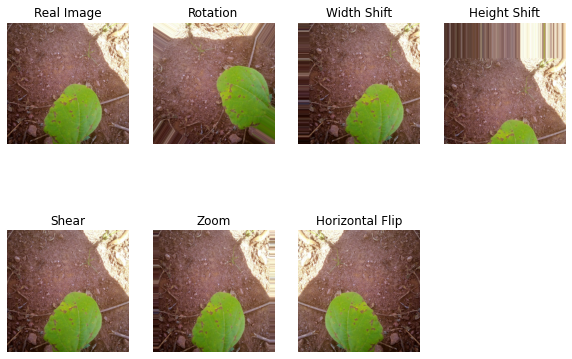

In [ ]:
def display_augmentation(IMG_PATH, ROTATION_RANGE, WIDTH_SHIFT_RANGE, 
                         HEIGHT_SHIFT_RANGE, SHEAR_RANGE, ZOOM_RANGE):
  """
  Params:
          
  """ 
  image = load_img(IMG_PATH)
  image_array = img_to_array(image)
  image_exp = np.expand_dims(image_array, 0)

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=ROTATION_RANGE)
  train_augment = train_datagen.flow(image_exp, batch_size=1)
  batch = train_augment.next()
  image_rotate = batch[0]

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     width_shift_range=WIDTH_SHIFT_RANGE)
  train_augment = train_datagen.flow(image_exp, batch_size=1)
  batch = train_augment.next()
  image_width_shift = batch[0]

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     height_shift_range=HEIGHT_SHIFT_RANGE)
  train_augment = train_datagen.flow(image_exp, batch_size=1)
  batch = train_augment.next()
  image_height_shift = batch[0]

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     shear_range=SHEAR_RANGE)
  train_augment = train_datagen.flow(image_exp, batch_size=1)
  batch = train_augment.next()
  image_shear = batch[0]

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=ZOOM_RANGE)
  train_augment = train_datagen.flow(image_exp, batch_size=1)
  batch = train_augment.next()
  image_zoom = batch[0]

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True)
  train_augment = train_datagen.flow(image_exp, batch_size=1)
  batch = train_augment.next()
  image_horizontal_flip = batch[0]

  fig = plt.figure(figsize=(10, 7))
  rows = 2
  cols = 4
  augmented_images = [0, image, image_rotate, image_width_shift, image_height_shift, image_shear, image_zoom, image_horizontal_flip]
  plt_title = [0, "Real Image", "Rotation", "Width Shift", "Height Shift", "Shear", "Zoom", "Horizontal Flip"]
  for index in range(len(augmented_images)):
    if index == 0:
      continue
    fig.add_subplot(rows, cols, index)
    plt.imshow(augmented_images[index])
    plt.axis('off')
    plt.title(plt_title[index])

# Get a random image from one particular class
random_image = random.choice(os.listdir(als_train_dir))
rotation_range = 60
width_shift_range = .4
height_shift_range = .4
shear_range = .3
zoom_range = .2
display_augmentation(os.path.join(als_train_dir, random_image),
                     rotation_range,
                     width_shift_range,
                     height_shift_range,
                     shear_range,
                     zoom_range)

In [8]:
# Set batch size and target image size
train_batch_size = 32
val_batch_size = 32
target_size = (150, 150)

# Get train and validation data generator
train_generator, validation_generator = train_val_generator(train_split_dir,
                                                            validation_split_dir,
                                                            target_size,
                                                            train_batch_size,
                                                            val_batch_size)

Found 902 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [9]:
print("Train Generator code for each class \n{}".format(train_generator.class_indices))
print("\n Validation Generator code for each class \n{}".format(validation_generator.class_indices))

Train Generator code for each class 
{'Angular Leaf Spot': 0, 'Bean Rust': 1, 'Health': 2}

 Validation Generator code for each class 
{'Angular Leaf Spot': 0, 'Bean Rust': 1, 'Health': 2}


# **Model v1.1**

## **Model Architecture**

In [167]:
def create_model(TARGET_SIZE):
  """
  Params:
        TARGET_SIZE: Tuple contains target size height and width   
  Returns:
        model: Created model
  """ 
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                             input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax', name="predict_class")
  ])

  
  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  return model

In [168]:
modelv1d1 = create_model(target_size)

modelv1d1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_460 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_461 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_462 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 17, 17, 128)    

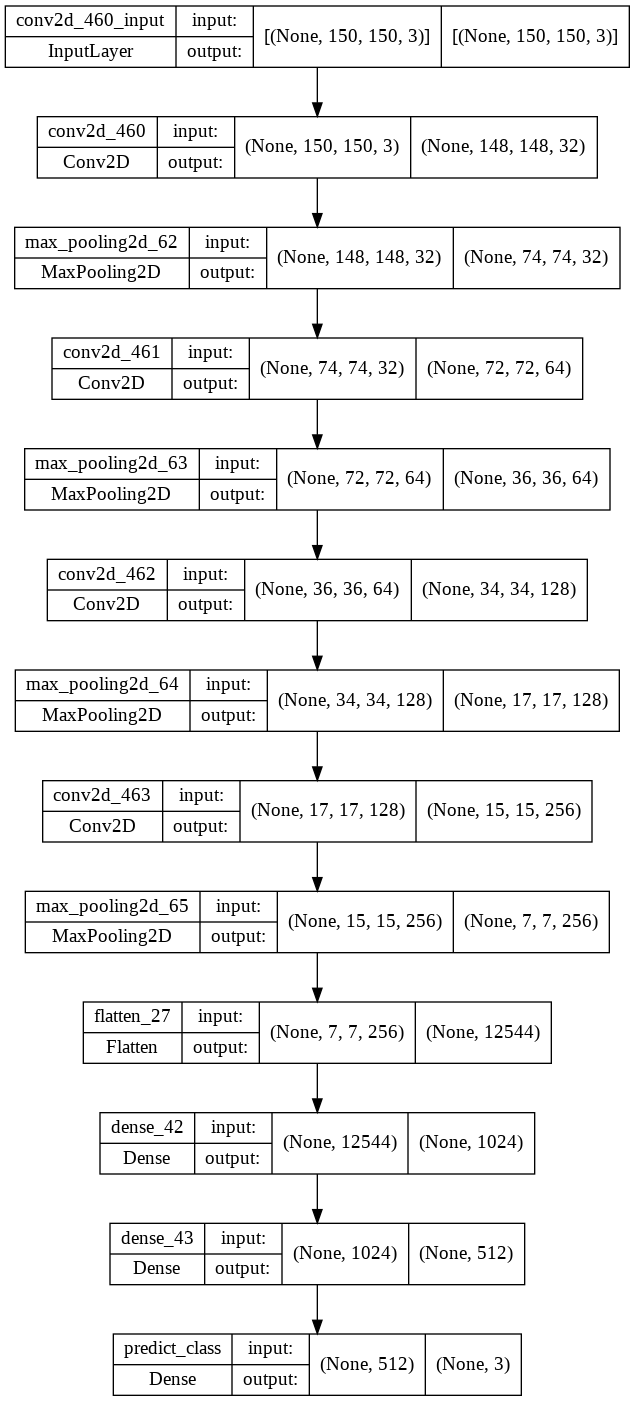

In [169]:
tf.keras.utils.plot_model(
    modelv1d1,
    to_file='modelv1d1.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

## **Train the Model**

In [170]:
# Callbacks schedule
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check
    if logs.get('accuracy') > .98 and logs.get('val_accuracy') > .98:

      # Stop if threshold is met
      print("\nThe thresholds are met so stop training!")
      self.model.stop_training = True

    # Get learning rate callbacks
    #lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

# Instantiate class
callbacks = myCallback()

# Create simple early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=7)


# Model checkpoint
model_checkp = tf.keras.callbacks.ModelCheckpoint('model_v1d1_checkp.h5', monitor='val_accuracy',
                                                  mode='max', verbose=1, save_best_only=True)

In [171]:
# Train the model
history = modelv1d1.fit(train_generator,
                         epochs=50,
                         steps_per_epoch=int(train_generator.samples/train_batch_size),
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=int(validation_generator.samples/val_batch_size),
                         callbacks=[callbacks, early_stop, model_checkp])

Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 1.0998 - accuracy: 0.3644
Epoch 1: val_accuracy improved from -inf to 0.44792, saving model to model_v1d1_checkp.h5
28/28 [==============================] - 69s 3s/step - loss: 1.0998 - accuracy: 0.3644 - val_loss: 1.0113 - val_accuracy: 0.4479
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 1.0517 - accuracy: 0.4126
Epoch 2: val_accuracy improved from 0.44792 to 0.47917, saving model to model_v1d1_checkp.h5
28/28 [==============================] - 11s 393ms/step - loss: 1.0517 - accuracy: 0.4126 - val_loss: 0.9675 - val_accuracy: 0.4792
Epoch 3/50
28/28 [==============================] - ETA: 0s - loss: 1.0180 - accuracy: 0.4747
Epoch 3: val_accuracy improved from 0.47917 to 0.53385, saving model to model_v1d1_checkp.h5
28/28 [==============================] - 11s 393ms/step - loss: 1.0180 - accuracy: 0.4747 - val_loss: 0.9322 - val_accuracy: 0.5339
Epoch 4/50
28/28 [==============================]

## **Result Plot**

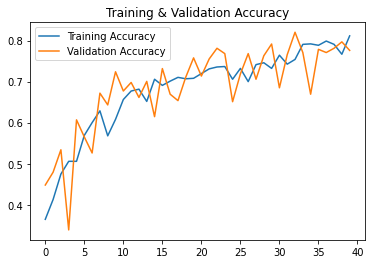

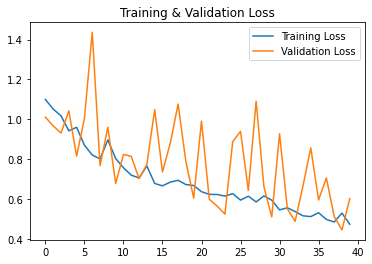

In [172]:
# Plot the train result
## Get accuracy and val_accuracy histories
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

## Get accuracy and val_accuracy losses
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

## Plot accuracies result
plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.show() 

plt.figure()

## Plot losses result
plt.plot(epochs, loss, label ='Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training & Validation Loss')

plt.legend()
plt.show()  

In [173]:
train_score = modelv1d1.evaluate(train_generator)
validation_score = modelv1d1.evaluate(validation_generator)

print('Overall Train Accuracy : ', train_score[1])
print('Overall Validation Accuracy: ', validation_score[1])

13/13 [==============================] - 2s 159ms/step - loss: 0.6114 - accuracy: 0.7744
Overall Train Accuracy :  0.8226163983345032
Overall Validation Accuracy:  0.7743589878082275


## **Image Predict**

Actual class: Bean Rust
Predicted class: Bean Rust
 with the probabilities for each class as follow 
[0.0484268  0.92184514 0.02972806]


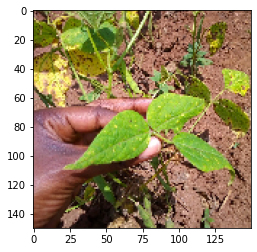

In [175]:
# Test image preprocess
class_list = sorted([dirs for root, dirs, files in os.walk(test_split_dir)][0])
random_class = os.path.join(test_split_dir, random.choice(class_list))
random_image = random.choice(os.listdir(random_class))
selected_image = load_img(os.path.join(random_class, random_image), target_size=target_size)
x = img_to_array(selected_image)
x = np.expand_dims(x, axis=0)
x = np.vstack([x])
x /= 255.

# Predict the image
classes = modelv1d1.predict(x)
predicted_class = np.argmax(classes)

# Display the image and its predicted class
imageplot = plt.imshow(selected_image)
print("Actual class: {}".format(random_class.split('/')[-1]))
print("Predicted class: {}\n with the probabilities for each class as follow \n{}".format(class_list[predicted_class], classes[0]))

Actual class: Health
Predicted class: Health
 with the probabilities for each class as follow 
[3.6478011e-07 4.5379312e-04 9.9954587e-01]


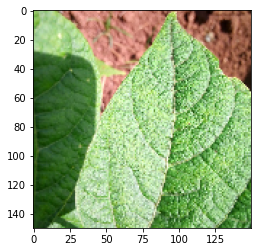

In [176]:
# Test image preprocess
class_list = sorted([dirs for root, dirs, files in os.walk(test_split_dir)][0])
random_class = os.path.join(test_split_dir, random.choice(class_list))
random_image = random.choice(os.listdir(random_class))
selected_image = load_img(os.path.join(random_class, random_image), target_size=target_size)
x = img_to_array(selected_image)
x = np.expand_dims(x, axis=0)
x = np.vstack([x])
x /= 255.

# Predict the image
classes = modelv1d1.predict(x)
predicted_class = np.argmax(classes)

# Display the image and its predicted class
imageplot = plt.imshow(selected_image)
print("Actual class: {}".format(random_class.split('/')[-1]))
print("Predicted class: {}\n with the probabilities for each class as follow \n{}".format(class_list[predicted_class], classes[0]))

## **Save & Export Model**

In [205]:
# Save the model
## Define temporary directory for save the model
MODEL_DIR = tempfile.gettempdir()
version = 1
diff = 1
version_path = os.path.join(MODEL_DIR, str(version))
export_path = os.path.join(version_path, str(diff))

## Ensure the temporary file
if os.path.isdir(export_path):
    print('\nPrepare the path, cleaning up!\n')
    !rm -r {export_path}

## Save the model
### tf format
modelv1d1.save(export_path, save_format="tf")
print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

### h5 keras format
saved_h5_format = './soybeanmodelv1d1.h5' 
modelv1d1.save(saved_h5_format)

INFO:tensorflow:Assets written to: /tmp/1/1/assets


INFO:tensorflow:Assets written to: /tmp/1/1/assets



export_path = /tmp/1/1
total 236
drwxr-xr-x 2 root root   4096 Jun  9 13:51 assets
-rw-r--r-- 1 root root  25079 Jun  9 13:51 keras_metadata.pb
-rw-r--r-- 1 root root 203518 Jun  9 13:51 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  9 13:51 variables


In [207]:
# Convert to .json format
## Install required library
!pip install tensorflowjs

## Path to .json directory
export_json_path = os.path.join(export_path, 'json_format')

## Ensure the temporary file
if os.path.isdir(export_json_path):
    print('\nPrepare the path, cleaning up!\n')
    !rm -r {export_json_path}

## Convert command
!tensorflowjs_converter --input_format=keras {saved_h5_format} {export_json_path}

##
!zip -r './jsonmodelv1d1.zip' {export_json_path}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  adding: tmp/1/1/json_format/ (stored 0%)
  adding: tmp/1/1/json_format/group1-shard3of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard10of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard2of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard8of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard12of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard7of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard1of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard6of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/model.json (deflated 85%)
  adding: tmp/1/1/json_format/group1-shard5of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard13of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard14of14.bin (deflated 8%)
  adding: tmp/1/1/json_format/group1-shard9of14.bin (deflated 8%)
  addi

In [206]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model and its classes
tflite_model_file = 'soybeanmodel_v1d1.tflite'

with open(tflite_model_file, "wb") as tf:
    tf.write(tflite_model)


with open('soybeanclasses_v1d1.txt', 'w') as classes:
    classes.write('\n'.join(soybeanleaf_classname))

In [208]:
try:
    files.download('soybeanmodel_v1d1.tflite')
    files.download('soybeanclasses_v1d1.txt')
    files.download('jsonmodelv1d1.zip')
    
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model v1.2 - Transfer Learning: Fine-Tuning InceptionResNet V2**

## **Model Architecture**

In [44]:
# Get the pre-trained model
def create_pre_trained_model(WEIGHTS, TARGET_SIZE):
  """
  Params:
        WEIGHTS: Choosen weights from pre trained model
        TARGET_SIZE: Tuple contains target size height and width   
  Returns:
        pre_trained_model: Imported pre trained model
  """ 
  ## Import Pre-Trained Model
  pre_trained_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(
      input_shape = (TARGET_SIZE[0], TARGET_SIZE[1], 3),
      include_top = False, 
      weights = WEIGHTS)
  
  return pre_trained_model

In [45]:
# Execute create_pre_trained_model function
## Use downloaded weights
pre_trained_model = create_pre_trained_model('imagenet', 
                                             target_size)

## Print the model summary
pre_trained_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_203 (Batch  (None, 74, 74, 32)  96          ['conv2d_203[0][0]']             
 Normalization)                                                                                   
                                                                                

In [46]:
# Create a function to pipeline imported model
## Set the desired layer from pre-trained model as a input for self-model
def output_of_last_layer(PRE_TRAINED_MODEL):
  """
  Params:
        PRE_TRAINED_MODEL: Imported pre trained model  
  Returns:
        last_output: The desired layer as a input for self-model
  """ 
  last_desired_layer = PRE_TRAINED_MODEL.get_layer('mixed_7a')
  last_output = last_desired_layer.output

  return last_output

In [47]:
# Execute the prior function
last_output = output_of_last_layer(pre_trained_model)

In [56]:
# Create Final Model
def create_model(PRE_TRAINED_MODEL, LAST_OUTPUT):
  """
  Params:
        PRE_TRAINED_MODEL: Imported pre trained model 
        LAST_OUTPUT: The desired layer as a input for self-model  
  Returns:
        model: Created model
  """ 
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(LAST_OUTPUT)
  # Add a fully connected layer with hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add dropout rate
  x = tf.keras.layers.Dropout(.8)(x)
  # Add a output layer for classification
  x = tf.keras.layers.Dense(3, activation='softmax', name="predict_class")(x) 

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=PRE_TRAINED_MODEL.input, outputs=x)

  # Fine Tuning
  NUM_LAYERS = 9 #@param {type:"slider", min:1, max:50, step:1}
  do_fine_tuning = True #@param {type:"boolean"}

  if do_fine_tuning:
      optimizer = tf.keras.optimizers.SGD(lr=5e-3, momentum=0.9)
      for layer in model.layers[-NUM_LAYERS:]:
          layer.trainable = True

      # Make all the layers in the pre-trained model trainable
      for layer in pre_trained_model.layers:
          layer.trainable = True
  else:
      optimizer = 'adam'

      # Make all the layers in the pre-trained model non-trainable
      for layer in pre_trained_model.layers:
          layer.trainable = False

  model.compile(loss=tf.keras.losses.CategoricalHinge(),
                optimizer=optimizer,
                metrics=['accuracy'])

  return model

In [57]:
# Get the model architecture by pass target_size defined before
modelv1d2 = create_model(pre_trained_model, last_output)

# Get model summary
modelv1d2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_203 (Batch  (None, 74, 74, 32)  96          ['conv2d_203[0][0]']             
 Normalization)                                                                                   
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


                                                                                                  
 batch_normalization_208 (Batch  (None, 16, 16, 96)  288         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_210 (Batch  (None, 16, 16, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_213 (Batch  (None, 16, 16, 96)  288         ['conv2d_213[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

In [204]:
# plot the model architecture
tf.keras.utils.plot_model(
    modelv1d2,
    to_file='modelv1d2.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.670397 to fit
tcmalloc: large alloc 1345150976 bytes == 0x55e26cfb8000 @  0x7fe81c9d7001 0x7fe818c6e1fa 0x7fe818c6e2ad 0x7fe819df96df 0x7fe81a2f0261 0x7fe81c76d468 0x7fe81c76fd53 0x55e26ac2d092 0x7fe81c122c87 0x55e26ac2d12a



## **Train the Model**

In [58]:
# Callbacks schedule
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check
    if logs.get('accuracy') > .98 and logs.get('val_accuracy') > .98:

      # Stop if threshold is met
      print("\nThe thresholds are met so stop training!")
      self.model.stop_training = True

    # Get learning rate callbacks
    #lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

# Instantiate class
callbacks = myCallback()

# Create simple early stopping
#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)


# Model checkpoint
model_checkp = tf.keras.callbacks.ModelCheckpoint('model_v1d2_checkp.h5', monitor='val_accuracy',
                                                  mode='max', verbose=1, save_best_only=True)

In [59]:
# Train the model
history = modelv1d2.fit(train_generator,
                        epochs=50,
                        steps_per_epoch=int(train_generator.samples/train_batch_size),
                        verbose=1,
                        validation_data=validation_generator,
                        validation_steps=int(validation_generator.samples/val_batch_size),
                        callbacks=[callbacks, model_checkp])

Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 0.5141 - accuracy: 0.8644
Epoch 1: val_accuracy improved from -inf to 0.91406, saving model to model_v1d2_checkp.h5
28/28 [==============================] - 74s 610ms/step - loss: 0.5141 - accuracy: 0.8644 - val_loss: 0.1746 - val_accuracy: 0.9141
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0.9586
Epoch 2: val_accuracy improved from 0.91406 to 0.94531, saving model to model_v1d2_checkp.h5
28/28 [==============================] - 15s 528ms/step - loss: 0.1387 - accuracy: 0.9586 - val_loss: 0.1203 - val_accuracy: 0.9453
Epoch 3/50
28/28 [==============================] - ETA: 0s - loss: 0.0995 - accuracy: 0.9621
Epoch 3: val_accuracy did not improve from 0.94531
28/28 [==============================] - 14s 480ms/step - loss: 0.0995 - accuracy: 0.9621 - val_loss: 0.1196 - val_accuracy: 0.9401
Epoch 4/50
28/28 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0

## **Result Plot & Model Score Evaluate**

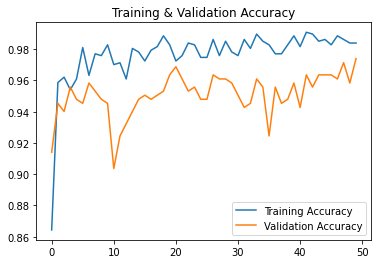

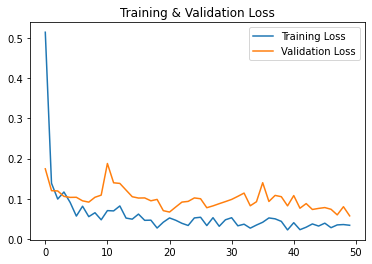

In [60]:
# Plot the train result
## Get accuracy and val_accuracy histories
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

## Get accuracy and val_accuracy losses
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

## Plot accuracies result
plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.show() 

plt.figure()

## Plot losses result
plt.plot(epochs, loss, label ='Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training & Validation Loss')

plt.legend()
plt.show()  

In [61]:
train_score = modelv1d2.evaluate(train_generator)
validation_score = modelv1d2.evaluate(validation_generator)

print('Overall Train Accuracy : ', train_score[1])
print('Overall Validation Accuracy: ', validation_score[1])

13/13 [==============================] - 2s 175ms/step - loss: 0.0611 - accuracy: 0.9718
Overall Train Accuracy :  0.9977827072143555
Overall Validation Accuracy:  0.971794843673706


## **Predict**

Actual class: Bean Rust
Predicted class: Bean Rust
 with the probabilities for each class as follow 
[1.1048562e-17 1.0000000e+00 7.4659210e-16]


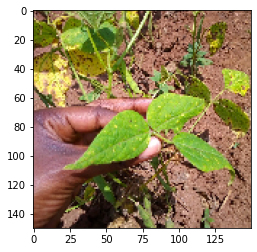

In [67]:
# Test image preprocess
class_list = sorted([dirs for root, dirs, files in os.walk(test_split_dir)][0])
random_class = os.path.join(test_split_dir, random.choice(class_list))
random_image = random.choice(os.listdir(random_class))
selected_image = load_img(os.path.join(random_class, random_image), target_size=target_size)
x = img_to_array(selected_image)
x = np.expand_dims(x, axis=0)
x = np.vstack([x])
x /= 255.

# Predict the image
classes = modelv1d2.predict(x)
predicted_class = np.argmax(classes)

# Display the image and its predicted class
imageplot = plt.imshow(selected_image)
print("Actual class: {}".format(random_class.split('/')[-1]))
print("Predicted class: {}\n with the probabilities for each class as follow \n{}".format(class_list[predicted_class], classes[0]))

Actual class: Health
Predicted class: Health
 with the probabilities for each class as follow 
[4.607434e-09 9.089432e-09 1.000000e+00]


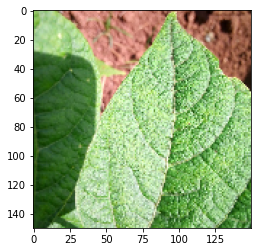

In [66]:
# Test image preprocess
class_list = sorted([dirs for root, dirs, files in os.walk(test_split_dir)][0])
random_class = os.path.join(test_split_dir, random.choice(class_list))
random_image = random.choice(os.listdir(random_class))
selected_image = load_img(os.path.join(random_class, random_image), target_size=target_size)
x = img_to_array(selected_image)
x = np.expand_dims(x, axis=0)
x = np.vstack([x])
x /= 255.

# Predict the image
classes = modelv1d2.predict(x)
predicted_class = np.argmax(classes)

# Display the image and its predicted class
imageplot = plt.imshow(selected_image)
print("Actual class: {}".format(random_class.split('/')[-1]))
print("Predicted class: {}\n with the probabilities for each class as follow \n{}".format(class_list[predicted_class], classes[0]))

## **Save & Export Model**

In [68]:
# Save the model
## Define temporary directory for save the model
MODEL_DIR = tempfile.gettempdir()
version = 1
diff = 2
version_path = os.path.join(MODEL_DIR, str(version))
export_path = os.path.join(version_path, str(diff))

## Ensure the temporary file
if os.path.isdir(export_path):
    print('\nPrepare the path, cleaning up!\n')
    !rm -r {export_path}

## Save the model
### tf format
modelv1d2.save(export_path, save_format="tf")
print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

### h5 keras format
saved_h5_format = './soybeanmodelv1d2.h5' 
modelv1d2.save(saved_h5_format)

INFO:tensorflow:Assets written to: /tmp/1/2/assets

export_path = /tmp/1/2
total 10568
drwxr-xr-x 2 root root    4096 Jun  9 12:37 assets
-rw-r--r-- 1 root root 1288855 Jun  9 12:37 keras_metadata.pb
-rw-r--r-- 1 root root 9520887 Jun  9 12:37 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  9 12:37 variables


In [70]:
# Convert to .json format
## Install required library
!pip install tensorflowjs

## Path to .json directory
export_json_path = os.path.join(export_path, 'json_format')

## Ensure the temporary file
if os.path.isdir(export_json_path):
    print('\nPrepare the path, cleaning up!\n')
    !rm -r {export_json_path}

## Convert command
!tensorflowjs_converter --input_format=keras {saved_h5_format} {export_json_path}

##
!zip -r './jsonmodelv1d2.zip' {export_json_path}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.6 MB/s 
     |████████████████████████████████| 40 kB 6.2 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


  adding: tmp/1/2/json_format/ (stored 0%)
  adding: tmp/1/2/json_format/group1-shard28of39.bin (deflated 8%)
  adding: tmp/1/2/json_format/group1-shard21of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard6of39.bin (deflated 6%)
  adding: tmp/1/2/json_format/group1-shard7of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard16of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard19of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard1of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard39of39.bin (deflated 8%)
  adding: tmp/1/2/json_format/group1-shard8of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard26of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard12of39.bin (deflated 5%)
  adding: tmp/1/2/json_format/group1-shard3of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard23of39.bin (deflated 7%)
  adding: tmp/1/2/json_format/group1-shard38of39.bin (deflated 8%)
  adding: tmp/1/2/json_f

In [69]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model and its classes
tflite_model_file = 'soybeanmodel_v1d2.tflite'

with open(tflite_model_file, "wb") as tf:
    tf.write(tflite_model)


with open('soybeanclasses_v1d2.txt', 'w') as classes:
    classes.write('\n'.join(soybeanleaf_classname))

In [71]:
try:
    files.download('soybeanmodel_v1d2.tflite')
    files.download('soybeanclasses_v1d2.txt')
    files.download('jsonmodelv1d2.zip')
    
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>